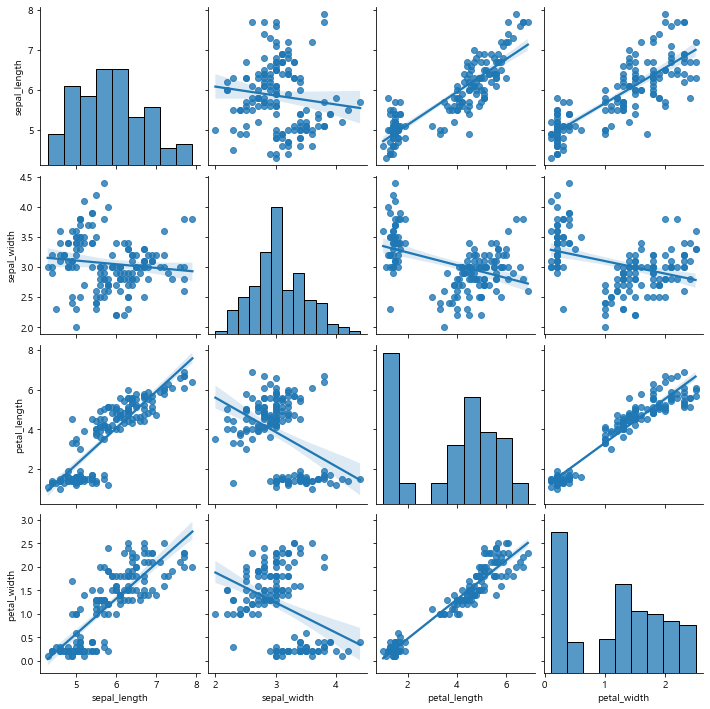

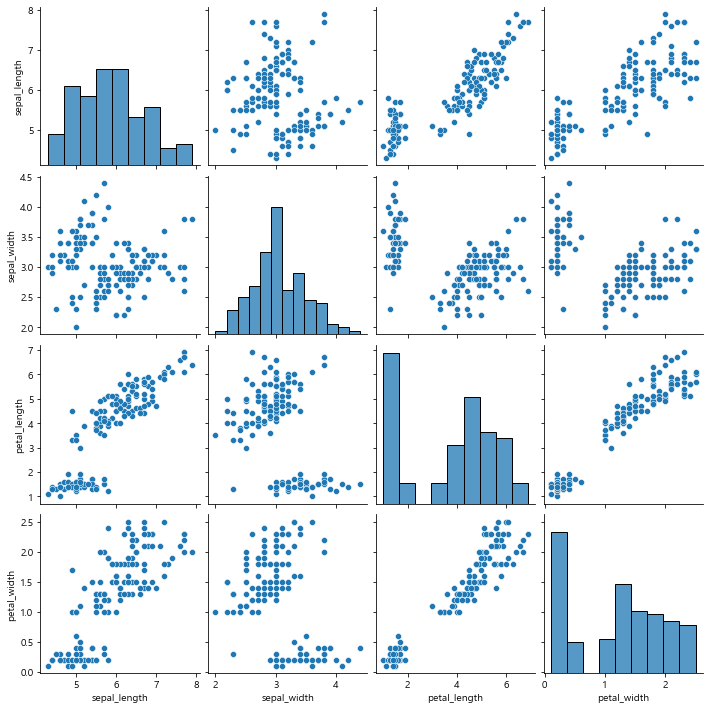

In [6]:
# 상관관계
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris')

# 플롯의 종류(kind): scatter, kde, hist, reg
# 회귀선 표시
sns.pairplot(df,
             kind="reg"             # 만들 플롯의 종류
             )
plt.show()

# 산점도
sns.pairplot(df,
             kind="scatter"         # 만들 플롯의 종류
             )
plt.show()

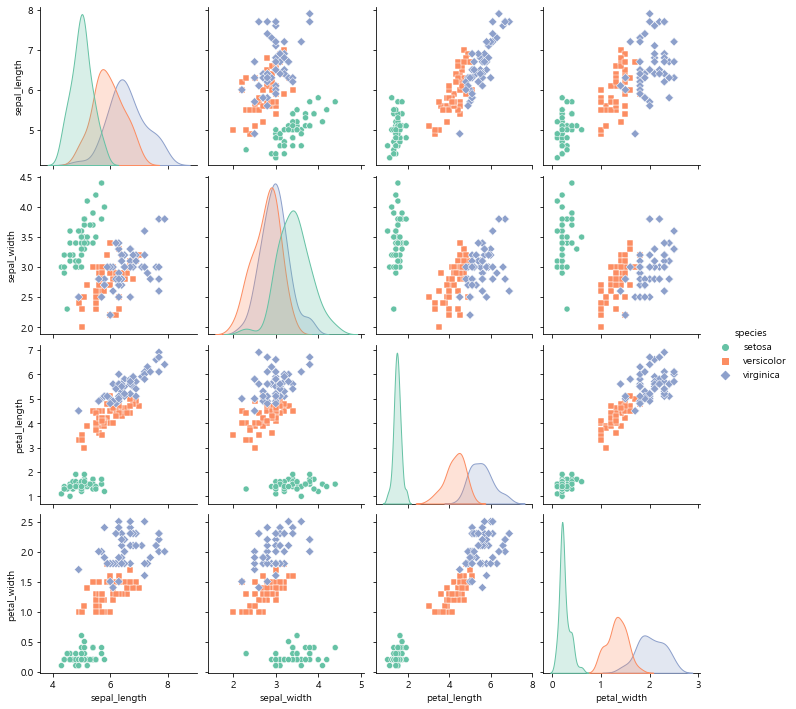

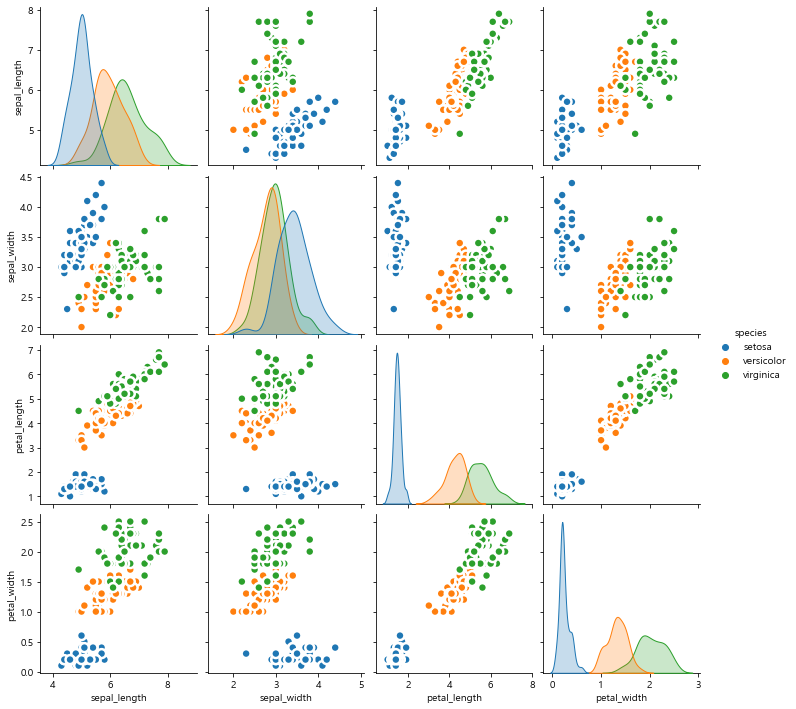

In [8]:
# 기능 추가
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris')

sns.pairplot(df,
             kind="scatter",                # 플롯의 종류
             hue="species",                 # 그룹 구분
             markers=["o", "s", "D"],       # 마커 모양 목록
             palette="Set2"                 # 새상 세트
             )
plt.show()

sns.pairplot(df,
             kind="scatter",                # 플롯의 종류
             hue="species",                 # 그룹 구분
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5)  # 플롯을 수정하기 위한 키워드 인수 사전
             )
plt.show()


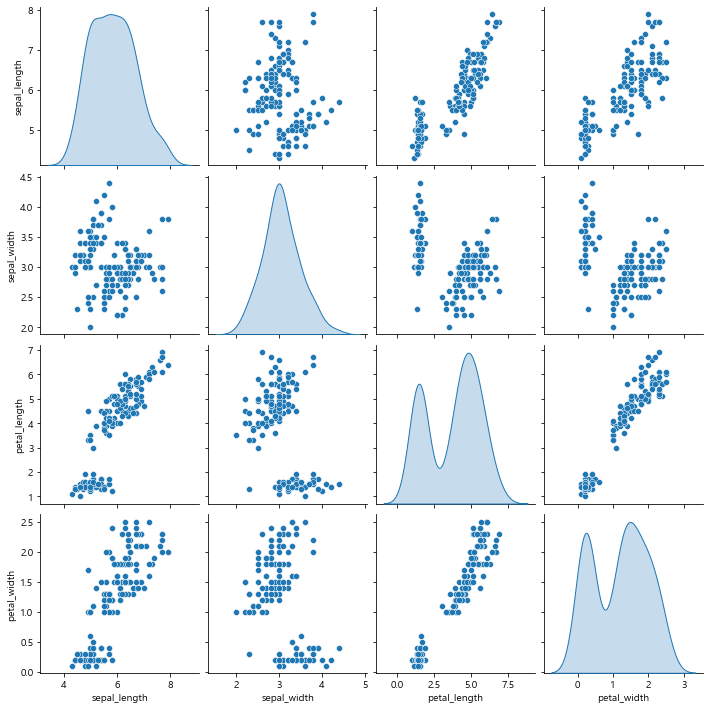

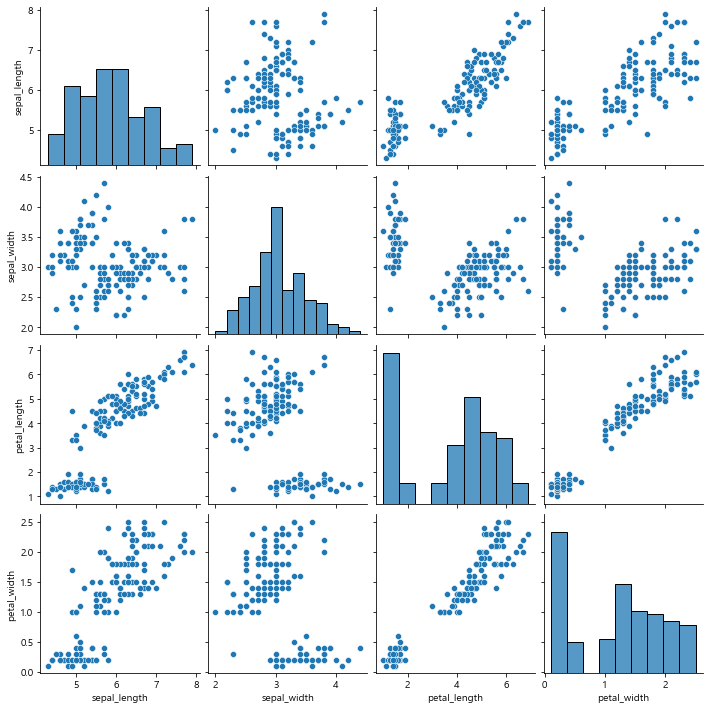

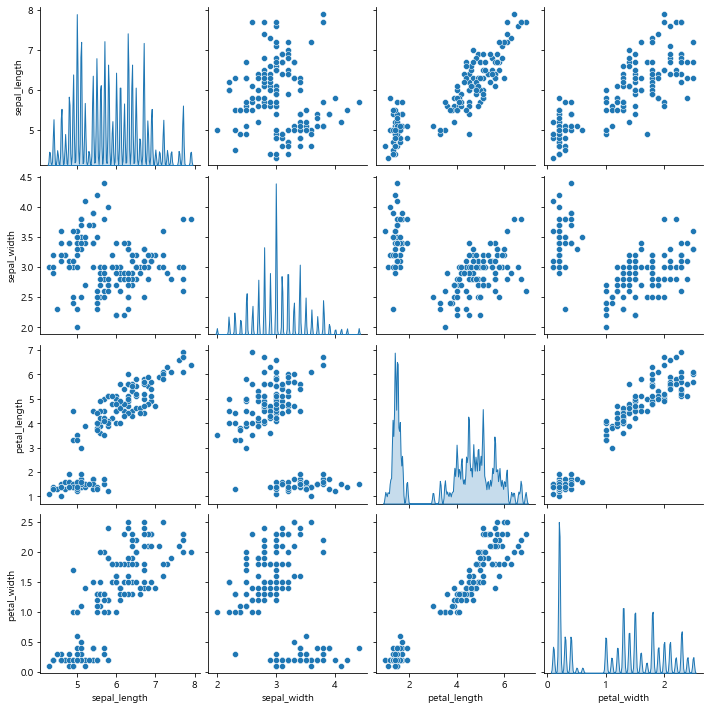

In [10]:
# 분포 표현
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

# 밀도함수
sns.pairplot(df, diag_kind="kde")

# 히스토그램
sns.pairplot(df, diag_kind="hist")

# 밀도함수 설정
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=0.05, vertical=False))

plt.show()

In [15]:
# matplotlib에서 특정 축 제거
# !pip install palmerpenguins
import palmerpenguins
import matplotlib.pyplot as plt

penguins = palmerpenguins.load_penguins().dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


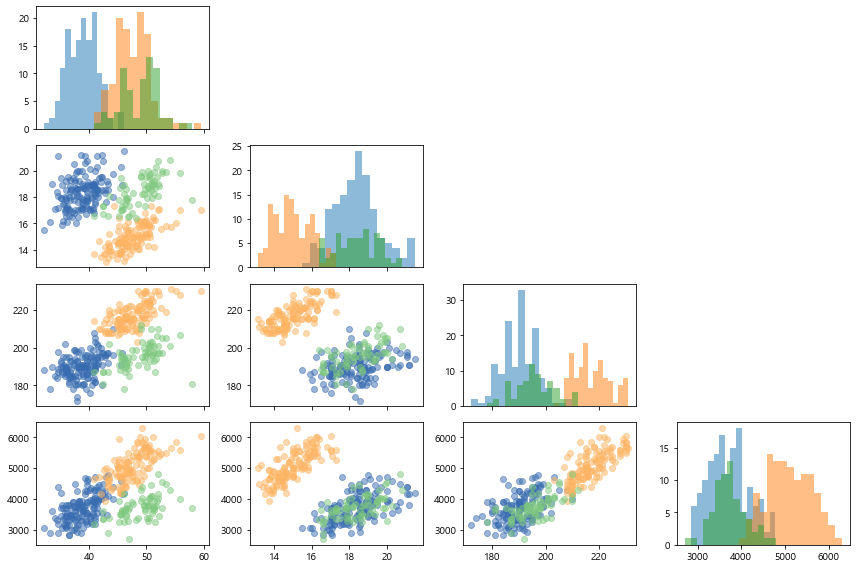

In [24]:
COLUMNS = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
COLORS = ["#386cb0", "#fdb462", "#7fc97f"]
SPECIES = ["Adelie", "Gentoo", "Chinstrap"]

# 분할
fig, axes = plt.subplots(4, 4, figsize = (12, 8), sharex="col", tight_layout=True)

# 음수기호 표시
plt.rcParams['axes.unicode_minus'] = False

# 그래프 나열
for i in range(len(COLUMNS)):
    for j in range(len(COLUMNS)):
        if i>j:
            for species, color in zip(SPECIES, COLORS):
                data = penguins[penguins["species"]==species]
                axes[i, j].scatter(COLUMNS[j], COLUMNS[i], color=color, alpha=0.5, data=data)
        # 대각선 축
        if i==j:
            for species, color in zip(SPECIES, COLORS):
                data = penguins[penguins["species"]==species]
                axes[i, j].hist(COLUMNS[j], bins=15, alpha=0.5, data=data)
        # 사용하지 않을 축 제거
        if i<j:
            axes[i, j].remove()